In [1]:
import re
import pandas as pd

In [2]:
f = open("WhatsApp Chat with Pankaj Gajpalla 23 Oct Kalinga.txt", 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

24/12/22, 20:22 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
03/04/23, 22:36 - Mahesh Kumar Shukla: <Media omitted>
09/04/23, 11:24 - Pankaj Gajpalla 23 Oct Kalinga: Bro send the above link again
09/04/23, 17:42 - Mahesh Kumar Shukla: <Media omitted>
09/04/23, 19:55 - Mahesh Kumar Shukla: Ye le vrooo ..
10/04/23, 10:07 - Mahesh Kumar Shukla: <Media omitted>
10/04/23, 13:05 - Mahesh Kumar Shukla: Bhai mai tujhe direct Grow refer code ka link bhejva raha hu.........usase open karke dekhana
21/04/23, 10:07 - Mahesh Kumar Shukla: https://drive.google.com/drive/folders/1VJ9wJMUFAoKP3fJQOa3rBskClbk941qN?usp=sharing
27/04/23, 13:28 - Pankaj Gajpalla 23 Oct Kalinga: Bhai class me kya ho ra
27/04/23, 13:32 - Mahesh Kumar Shukla: Abhi tho kuch nhi......
27/04/23, 13:33 - Mahesh Kumar Shukla: Sabko class me se bhaga diye hai
27/04/23, 13:33 - Mahesh Kumar Shukla: 2 baje bulai hai mam
27/04/23, 13:45 - Pankaj Gajpalla 23 Oc

In [5]:
print(type(data))

<class 'str'>


# Preprocessor

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp.1\AppData\Local\Temp\ipykernel_10644\685747602.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [7]:
messages = re.split(pattern, data)
messages #in the starting we can see an empty string so to remove it  ...

['',
 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 'Mahesh Kumar Shukla: <Media omitted>\n',
 'Pankaj Gajpalla 23 Oct Kalinga: Bro send the above link again\n',
 'Mahesh Kumar Shukla: <Media omitted>\n',
 'Mahesh Kumar Shukla: Ye le vrooo ..\n',
 'Mahesh Kumar Shukla: <Media omitted>\n',
 'Mahesh Kumar Shukla: Bhai mai tujhe direct Grow refer code ka link bhejva raha hu.........usase open karke dekhana\n',
 'Mahesh Kumar Shukla: https://drive.google.com/drive/folders/1VJ9wJMUFAoKP3fJQOa3rBskClbk941qN?usp=sharing\n',
 'Pankaj Gajpalla 23 Oct Kalinga: Bhai class me kya ho ra\n',
 'Mahesh Kumar Shukla: Abhi tho kuch nhi......\n',
 'Mahesh Kumar Shukla: Sabko class me se bhaga diye hai\n',
 'Mahesh Kumar Shukla: 2 baje bulai hai mam\n',
 'Pankaj Gajpalla 23 Oct Kalinga: Ara hu mai\n',
 'Pankaj Gajpalla 23 Oct Kalinga: Tu kidhar hai\n',
 'Mahesh Kumar Shukla: Hostel ke niche wali class me baitha hu\n',
 'Mahesh K

In [8]:
messages = re.split(pattern, data)[1:]
len(messages)

4845

In [9]:
dates = re.findall(pattern, data)
len(dates)

4845

In [10]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})

# convert message date type 
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date':'date'}, inplace=True)
df

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2022-12-24 20:22:00
1,Mahesh Kumar Shukla: <Media omitted>\n,2023-04-03 22:36:00
2,Pankaj Gajpalla 23 Oct Kalinga: Bro send the a...,2023-04-09 11:24:00
3,Mahesh Kumar Shukla: <Media omitted>\n,2023-04-09 17:42:00
4,Mahesh Kumar Shukla: Ye le vrooo ..\n,2023-04-09 19:55:00
...,...,...
4840,Pankaj Gajpalla 23 Oct Kalinga: ct me\n,2025-04-09 09:25:00
4841,Pankaj Gajpalla 23 Oct Kalinga: khila dunga\n,2025-04-09 09:25:00
4842,Pankaj Gajpalla 23 Oct Kalinga: pani puri\n,2025-04-09 09:25:00
4843,Pankaj Gajpalla 23 Oct Kalinga: malik ko bolka...,2025-04-09 09:26:00


In [11]:
df.shape

(4845, 2)

In [12]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2022-12-24 20:22:00
1,Mahesh Kumar Shukla: <Media omitted>\n,2023-04-03 22:36:00
2,Pankaj Gajpalla 23 Oct Kalinga: Bro send the a...,2023-04-09 11:24:00
3,Mahesh Kumar Shukla: <Media omitted>\n,2023-04-09 17:42:00
4,Mahesh Kumar Shukla: Ye le vrooo ..\n,2023-04-09 19:55:00


In [13]:
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)

    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])

df['users'] = users
df['message'] = messages

df.drop(columns=['user_message'], inplace=True)

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hp.1\AppData\Local\Temp\ipykernel_10644\37394114.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


In [14]:
df.head()

,date,users,message
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n


In [15]:
df['year'] = df['date'].dt.year

df.head()

,date,users,message,year
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023


In [16]:
df['month'] = df['date'].dt.month_name()

df.head()

,date,users,message,year,month
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April


In [17]:
df['day'] = df['date'].dt.day

df['hour'] = df['date'].dt.hour

df['minute'] = df['date'].dt.minute

df.head()

,date,users,message,year,month,day,hour,minute
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April,9,11,24
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,9,17,42
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April,9,19,55


In [18]:
print("*"*100)

****************************************************************************************************


In [20]:
df[df['users'] == "Mahesh Kumar Shukla"].shape[0]

1955

In [22]:
df.head(2)

,date,users,message,year,month,day,hour,minute
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36


In [24]:
words = []
for message in df['message']:
    words.extend(message.split()) #split with spaces

len(words)

20834

In [28]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls('lets www.gmail.com have url  stackoverflow.com as an example google.com, https://facebook.com',)

urls

['www.gmail.com', 'stackoverflow.com', 'google.com', 'https://facebook.com']

In [29]:
# 🔹 append() → Adds a single item to the end of the list

a = [1, 2, 3]
a.append([4, 5])
print(a)  # 👉 [1, 2, 3, [4, 5]]

[1, 2, 3, [4, 5]]


In [30]:
# 🔸 extend() → Adds each element from an iterable to the end
a = [1, 2, 3]
a.extend([4, 5])
print(a)  # 👉 [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]


In [33]:
extractor = URLExtract()

links = []

for message in df['message']:
    # print(extractor.find_urls(message))
    links.extend(extractor.find_urls(message))

In [34]:
links

['https://drive.google.com/drive/folders/1VJ9wJMUFAoKP3fJQOa3rBskClbk941qN?usp=sharing',
 'https://docs.google.com/spreadsheets/d/16O-IrFxpZ4oqWSpLCWUxGdA6hUBSK0SOUn3AdePca34/edit?usp=sharing',
 'Chess.com',
 'https://friend.chess.com/54mWK',
 'https://youtu.be/rhwAeqw7YDA?si=HIifeJmimBWjukHf',
 'https://youtu.be/drqlyZ14Z7s?si=rut85hT521rCcbSB',
 'https://pankajgajpalla.github.io/Trelmak/',
 'https://youtube.com/shorts/1up0LLy0BMo?si=xYaGnGhADTuCRXD7',
 'https://swayam.gov.in/explorer',
 'https://www.bhaskar.com/local/chhattisgarh/durg-bhilai/news/states-first-it-park-will-be-built-in-durg-132370925.html',
 'https://chat.whatsapp.com/Ke6F04LRQIcIQBvoeDG9g8',
 'https://surveyheart.com/form/659fda6fc7dd9c78f379e2b7',
 'https://www.youtube.com/watch?v=Y9253_M38Xk',
 'https://youtu.be/_0DzQ2LyWrU?si=W1Wwbb5L_yfPOuMP',
 'https://youtu.be/pl7_GyhUMpc?si=d1Kd1f1iFnLcOTAF',
 'https://youtu.be/6UXaV8y__Kw?si=JtgNXnQ401nsODzg',
 'https://youtu.be/X5ZyFIL63bU?si=Jlh2p6vNuQvGjkTb',
 'https://yout

In [35]:
len(links)

64

In [37]:
# to find the most busy user 
df.head()

,date,users,message,year,month,day,hour,minute
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April,9,11,24
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,9,17,42
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April,9,19,55


In [40]:
df['users'].value_counts().head()

users
Pankaj Gajpalla 23 Oct Kalinga    2886
Mahesh Kumar Shukla               1955
group notification                   4
Name: count, dtype: int64

In [41]:
import matplotlib.pyplot as plt


In [58]:
x.values

array([2886, 1955,    4], dtype=int64)

In [59]:
x = df['users'].value_counts().head()
name = x.index
count = x.values


<BarContainer object of 3 artists>

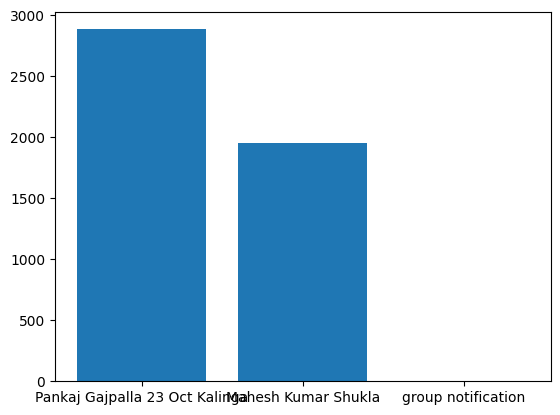

In [60]:
plt.bar(name, count)

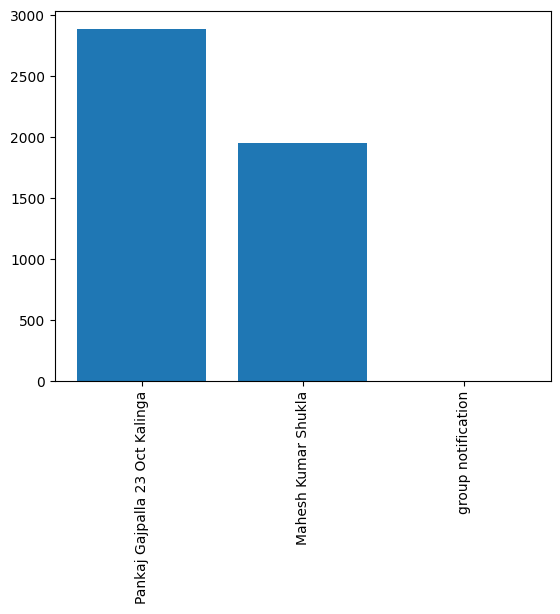

In [63]:
plt.bar(name, count)
plt.xticks(rotation="vertical")
plt.show()

In [68]:
round((df['users'].value_counts()/df.shape[0])*100, 2)

users
Pankaj Gajpalla 23 Oct Kalinga    59.57
Mahesh Kumar Shukla               40.35
group notification                 0.08
Name: count, dtype: float64

In [70]:
round((df['users'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={"users":"name","count":"percent(%)"})

,name,percent(%)
0,Pankaj Gajpalla 23 Oct Kalinga,59.57
1,Mahesh Kumar Shukla,40.35
2,group notification,0.08


In [74]:
df["message"]

0       Messages and calls are end-to-end encrypted. O...
1                                       <Media omitted>\n
2                         Bro send the above link again\n
3                                       <Media omitted>\n
4                                        Ye le vrooo ..\n
                              ...                        
4840                                              ct me\n
4841                                        khila dunga\n
4842                                          pani puri\n
4843                                  malik ko bolkarke\n
4844                                    <Media omitted>\n
Name: message, Length: 4845, dtype: object

In [75]:
words = []

for message in df['message']:
    words.extend(message.split())

words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 '<Media',
 'omitted>',
 'Bro',
 'send',
 'the',
 'above',
 'link',
 'again',
 '<Media',
 'omitted>',
 'Ye',
 'le',
 'vrooo',
 '..',
 '<Media',
 'omitted>',
 'Bhai',
 'mai',
 'tujhe',
 'direct',
 'Grow',
 'refer',
 'code',
 'ka',
 'link',
 'bhejva',
 'raha',
 'hu.........usase',
 'open',
 'karke',
 'dekhana',
 'https://drive.google.com/drive/folders/1VJ9wJMUFAoKP3fJQOa3rBskClbk941qN?usp=sharing',
 'Bhai',
 'class',
 'me',
 'kya',
 'ho',
 'ra',
 'Abhi',
 'tho',
 'kuch',
 'nhi......',
 'Sabko',
 'class',
 'me',
 'se',
 'bhaga',
 'diye',
 'hai',
 '2',
 'baje',
 'bulai',
 'hai',
 'mam',
 'Ara',
 'hu',
 'mai',
 'Tu',
 'kidhar',
 'hai',
 'Hostel',
 'ke',
 'niche',
 'wali',
 'class',
 'me',
 'baitha',
 'hu',
 '5',
 'min',
 'me',
 'aata',
 'hu',
 'mai',
 'bhi',
 'Class',
 '👍',
 'Attandance',
 'laga'

In [76]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,588
1,omitted>,588
2,hai,422
3,Bhai,285
4,me,250
5,nhi,231
6,to,208
7,bhai,199
8,ka,173
9,se,172


we need to filter this before doing it 

# filter
## remove group messages and group notificatoins
## remove media omited messages
##  remove stop word


In [79]:
df[df['users'] == 'group notification']

,date,users,message,year,month,day,hour,minute
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22
123,2023-07-12 20:36:00,group notification,Your security code with Pankaj Gajpalla 23 Oct...,2023,July,12,20,36
808,2023-11-13 07:16:00,group notification,Your security code with Pankaj Gajpalla 23 Oct...,2023,November,13,7,16
4759,2025-03-25 00:47:00,group notification,You pinned a message\n,2025,March,25,0,47


In [80]:
df[df['users'] != 'group notification']

,date,users,message,year,month,day,hour,minute
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April,9,11,24
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,9,17,42
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April,9,19,55
5,2023-04-10 10:07:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,10,10,7
...,...,...,...,...,...,...,...,...
4840,2025-04-09 09:25:00,Pankaj Gajpalla 23 Oct Kalinga,ct me\n,2025,April,9,9,25
4841,2025-04-09 09:25:00,Pankaj Gajpalla 23 Oct Kalinga,khila dunga\n,2025,April,9,9,25
4842,2025-04-09 09:25:00,Pankaj Gajpalla 23 Oct Kalinga,pani puri\n,2025,April,9,9,25
4843,2025-04-09 09:26:00,Pankaj Gajpalla 23 Oct Kalinga,malik ko bolkarke\n,2025,April,9,9,26


In [91]:
temp = df[df['users'] != 'group notification']
tmep = temp[temp['message'] != "<Media omitted>\n"]

In [92]:
f = open("stop_hinglish.txt", 'r')
stop_words = f.read()

In [93]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [94]:
from collections import Counter

In [97]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,send,68
1,message,68
2,🥲,66
3,😁,63
4,🫠,46
5,call,44
6,🙂,41
7,🥹,39
8,patient,39
9,bhj,37


In [98]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   -------------------------------------- 590.6/590.6 kB 915.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import emoji

In [102]:
import emoji.unicode_codes

In [105]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [108]:
k = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).head(5)

In [109]:
k

,0,1
0,🥲,92
1,😁,76
2,🥹,57
3,🫠,55
4,😂,54


<BarContainer object of 5 artists>

c:\Program Files\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129760 (\N{MELTING FACE}) missing from current font.
  func(*args, **kwargs)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:

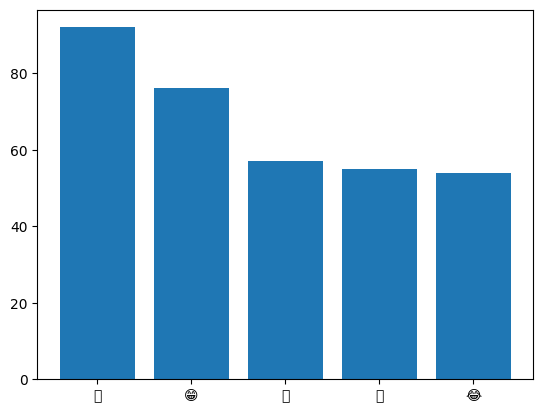

In [110]:
plt.bar(k[0], k[1])

In [ ]:
df['month_num'] = df['date'].dt.month
df.head() #agar month number me hoga to group by karthe banega:)

,date,users,message,year,month,day,hour,minute,month_num
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22,12
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36,4
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April,9,11,24,4
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,9,17,42,4
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April,9,19,55,4


In [114]:
df.groupby(['year', 'month_num']).count()['message']

year  month_num
2022  12             1
2023  4             20
      5             64
      6             38
      7              4
      8            219
      9            398
      10            64
      11           197
      12           445
2024  1            256
      2            280
      3             83
      4             22
      5            202
      6             94
      7             16
      8            268
      9            610
      10           191
      11           352
      12           497
2025  1            188
      2            119
      3            158
      4             59
Name: message, dtype: int64

In [116]:
time_line = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [117]:
time_line

,year,month_num,month,message
0,2022,12,December,1
1,2023,4,April,20
2,2023,5,May,64
3,2023,6,June,38
4,2023,7,July,4
5,2023,8,August,219
6,2023,9,September,398
7,2023,10,October,64
8,2023,11,November,197
9,2023,12,December,445


In [119]:
for i in time_line:
    print(i)

year
month_num
month
message


In [122]:
for i in range(time_line.shape[0]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
for i in range(time_line.shape[0]):
    print(time_line['month'])

0      December
1         April
2           May
3          June
4          July
5        August
6     September
7       October
8      November
9      December
10      January
11     February
12        March
13        April
14          May
15         June
16         July
17       August
18    September
19      October
20     November
21     December
22      January
23     February
24        March
25        April
Name: month, dtype: object
0      December
1         April
2           May
3          June
4          July
5        August
6     September
7       October
8      November
9      December
10      January
11     February
12        March
13        April
14          May
15         June
16         July
17       August
18    September
19      October
20     November
21     December
22      January
23     February
24        March
25        April
Name: month, dtype: object
0      December
1         April
2           May
3          June
4          July
5        August
6     September
7 

In [133]:
time = []
for i in range(time_line.shape[0]):
    print(time_line['month'][i] + " - " + str(time_line['year'][i]))

December - 2022
April - 2023
May - 2023
June - 2023
July - 2023
August - 2023
September - 2023
October - 2023
November - 2023
December - 2023
January - 2024
February - 2024
March - 2024
April - 2024
May - 2024
June - 2024
July - 2024
August - 2024
September - 2024
October - 2024
November - 2024
December - 2024
January - 2025
February - 2025
March - 2025
April - 2025


In [134]:
time = []
for i in range(time_line.shape[0]):
    time.append(time_line['month'][i] + " - " + str(time_line['year'][i]))

In [136]:
time

['December - 2022',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'January - 2024',
 'February - 2024',
 'March - 2024',
 'April - 2024',
 'May - 2024',
 'June - 2024',
 'July - 2024',
 'August - 2024',
 'September - 2024',
 'October - 2024',
 'November - 2024',
 'December - 2024',
 'January - 2025',
 'February - 2025',
 'March - 2025',
 'April - 2025']

In [137]:
time_line['time'] = time
time_line

,year,month_num,month,message,time
0,2022,12,December,1,December - 2022
1,2023,4,April,20,April - 2023
2,2023,5,May,64,May - 2023
3,2023,6,June,38,June - 2023
4,2023,7,July,4,July - 2023
5,2023,8,August,219,August - 2023
6,2023,9,September,398,September - 2023
7,2023,10,October,64,October - 2023
8,2023,11,November,197,November - 2023
9,2023,12,December,445,December - 2023


<function matplotlib.pyplot.show(close=None, block=None)>

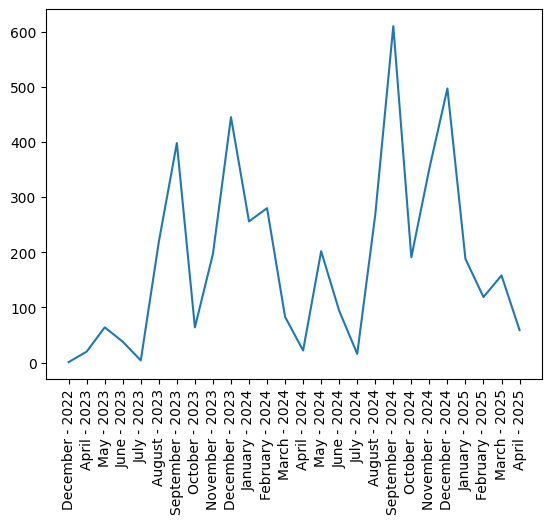

In [138]:
plt.plot(time_line['time'], time_line['message'])
plt.xticks(rotation='vertical')
plt.show

In [144]:
#daily time_line

df['only_date'] = df['date'].dt.date

In [145]:
df['only_date']

0       2022-12-24
1       2023-04-03
2       2023-04-09
3       2023-04-09
4       2023-04-09
           ...    
4840    2025-04-09
4841    2025-04-09
4842    2025-04-09
4843    2025-04-09
4844    2025-04-09
Name: only_date, Length: 4845, dtype: object

In [149]:
df.groupby(['only_date']).count()['message'].reset_index()

,only_date,message
0,2022-12-24,1
1,2023-04-03,1
2,2023-04-09,3
3,2023-04-10,2
4,2023-04-21,1
...,...,...
325,2025-04-03,2
326,2025-04-04,6
327,2025-04-06,4
328,2025-04-07,6


In [150]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

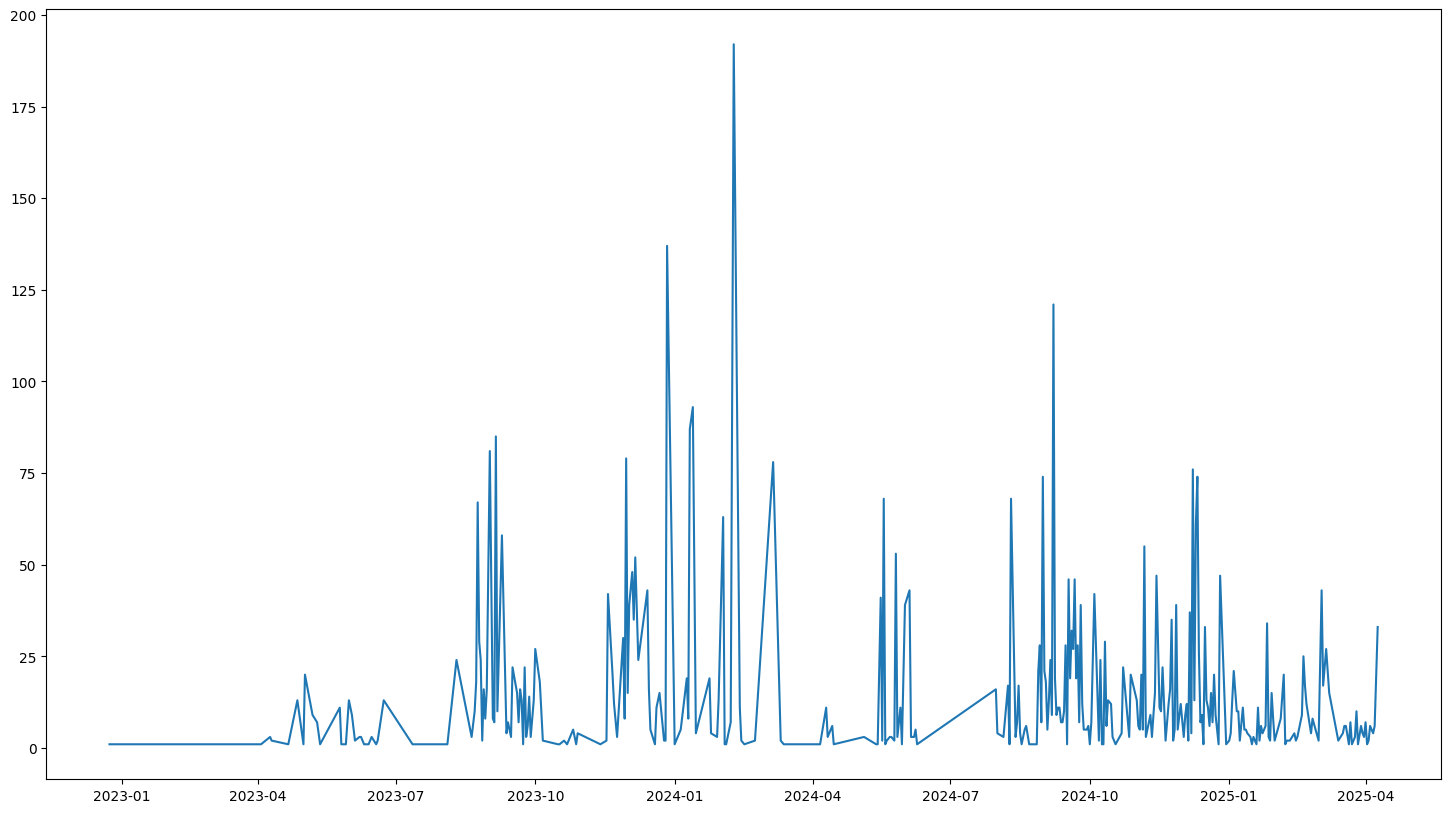

In [151]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.show()

In [152]:
df["day_name"] = df["date"].dt.day_name()

In [153]:
df["day_name"].value_counts()

day_name
Wednesday    949
Saturday     879
Thursday     775
Friday       768
Tuesday      618
Sunday       463
Monday       393
Name: count, dtype: int64

In [154]:
#heat map
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+"-"+str('00'))
    elif hour == 0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [156]:
period[0:9]

['20-21',
 '22-23',
 '11-12',
 '17-18',
 '19-20',
 '10-11',
 '13-14',
 '10-11',
 '13-14']

In [157]:
df['period'] = period

In [158]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only date,only_date,day_name,period
0,2022-12-24 20:22:00,group notification,Messages and calls are end-to-end encrypted. O...,2022,December,24,20,22,12,2022-12-24,2022-12-24,Saturday,20-21
1,2023-04-03 22:36:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,3,22,36,4,2023-04-03,2023-04-03,Monday,22-23
2,2023-04-09 11:24:00,Pankaj Gajpalla 23 Oct Kalinga,Bro send the above link again\n,2023,April,9,11,24,4,2023-04-09,2023-04-09,Sunday,11-12
3,2023-04-09 17:42:00,Mahesh Kumar Shukla,<Media omitted>\n,2023,April,9,17,42,4,2023-04-09,2023-04-09,Sunday,17-18
4,2023-04-09 19:55:00,Mahesh Kumar Shukla,Ye le vrooo ..\n,2023,April,9,19,55,4,2023-04-09,2023-04-09,Sunday,19-20


In [159]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,0.0,67.0,27.0,19.0,31.0,25.0,29.0,8.0,4.0,...,21.0,43.0,19.0,0.0,1.0,0.0,0.0,16.0,6.0,40.0
Monday,9.0,0.0,16.0,22.0,16.0,29.0,10.0,60.0,8.0,15.0,...,30.0,64.0,4.0,0.0,0.0,2.0,1.0,5.0,2.0,14.0
Saturday,0.0,22.0,45.0,8.0,40.0,17.0,96.0,27.0,41.0,18.0,...,97.0,11.0,102.0,0.0,0.0,0.0,6.0,9.0,3.0,12.0
Sunday,10.0,1.0,2.0,14.0,15.0,3.0,30.0,14.0,6.0,29.0,...,40.0,74.0,60.0,0.0,0.0,0.0,2.0,3.0,9.0,4.0
Thursday,17.0,4.0,23.0,48.0,25.0,16.0,10.0,4.0,15.0,27.0,...,66.0,26.0,7.0,1.0,3.0,3.0,26.0,10.0,11.0,48.0
Tuesday,22.0,2.0,18.0,34.0,61.0,57.0,2.0,22.0,9.0,8.0,...,70.0,42.0,11.0,2.0,4.0,0.0,0.0,9.0,12.0,28.0
Wednesday,20.0,10.0,31.0,49.0,35.0,16.0,30.0,117.0,30.0,18.0,...,76.0,45.0,54.0,0.0,1.0,0.0,7.0,11.0,23.0,88.0


In [160]:
import seaborn as sns

In [ ]:
ass = df.groupby(['hour']).count()

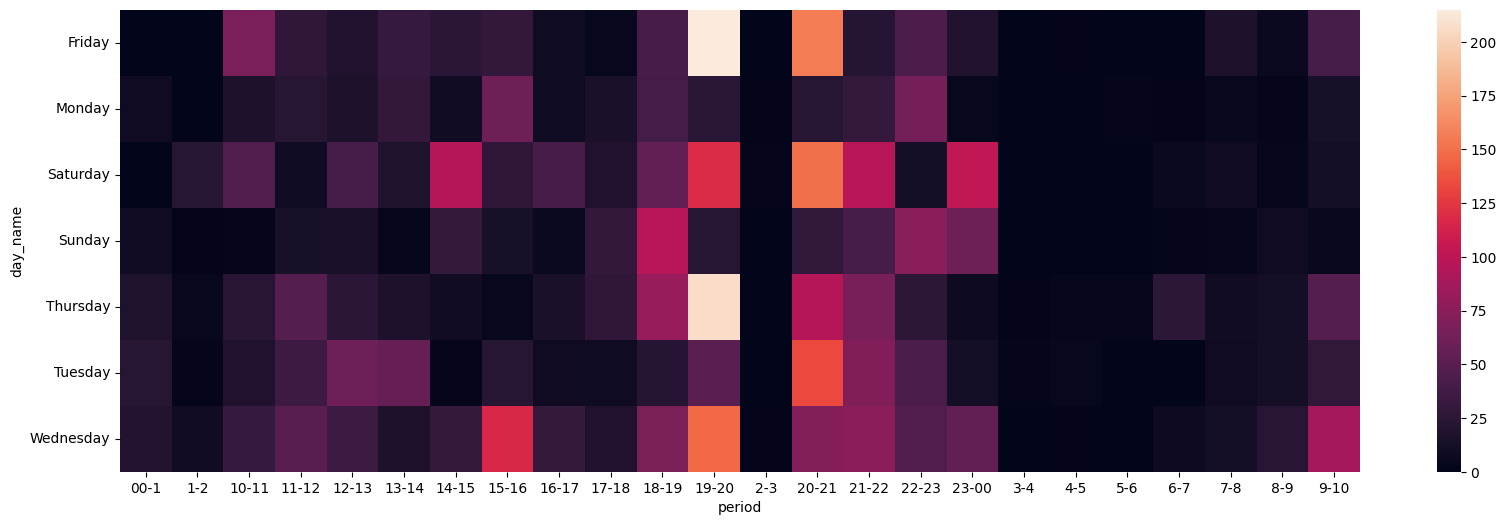

In [163]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation= "horizontal")
plt.show() 
